<a href="https://colab.research.google.com/github/palvgoya/master_kschool/blob/master/supervised_learning_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
%pylab inline



Populating the interactive namespace from numpy and matplotlib


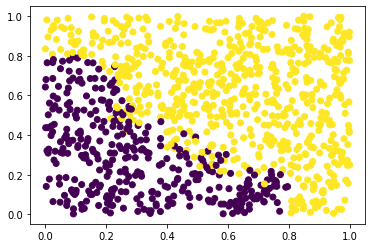

In [5]:
df= pd.read_csv('https://raw.githubusercontent.com/rezpe/datos_viz/master/terrain.csv')

X=df[['bumpiness','grade']]
y=df['target']

plt.scatter(df['bumpiness'],df['grade'],c=df['target'])

In [6]:
X = df[["bumpiness","grade"]]
y = df["target"]

def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")


In [7]:
# Importar el modelo
from sklearn.linear_model import LogisticRegression

In [8]:
# Crear instancia
clf= LogisticRegression()

In [9]:
# Entrenamos el modelo
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
clf.predict([[0.5,0.6]])

array([1.])

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,scoring='accuracy').mean()


0.9289999999999999

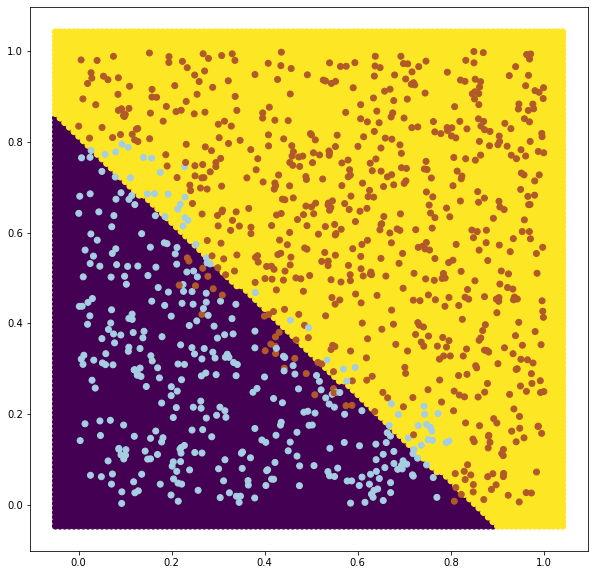

In [12]:
draw(clf,X.values,y.values,0.01)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X,y)
cross_val_score(clf,X,y,scoring='accuracy').mean()

0.9380000000000001

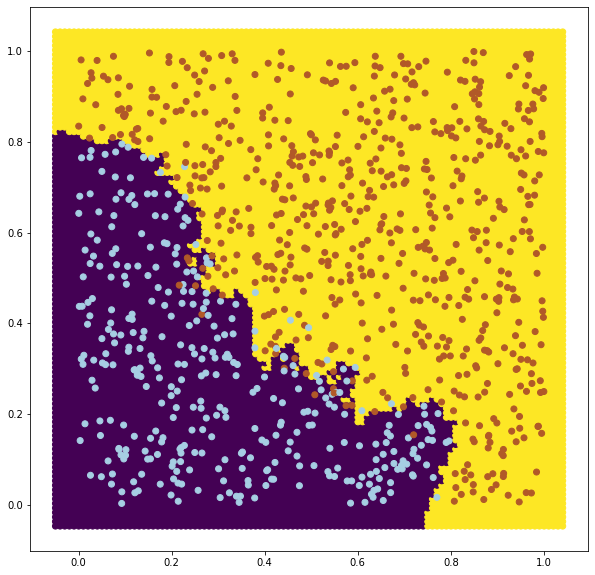

In [14]:
draw(clf,X.values,y.values,0.01)

In [15]:
from sklearn.model_selection import GridSearchCV
import numpy as np
clf_grid= GridSearchCV(KNeighborsClassifier(),param_grid={'n_neighbors':np.arange(2,50)})
clf_grid.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
clf_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

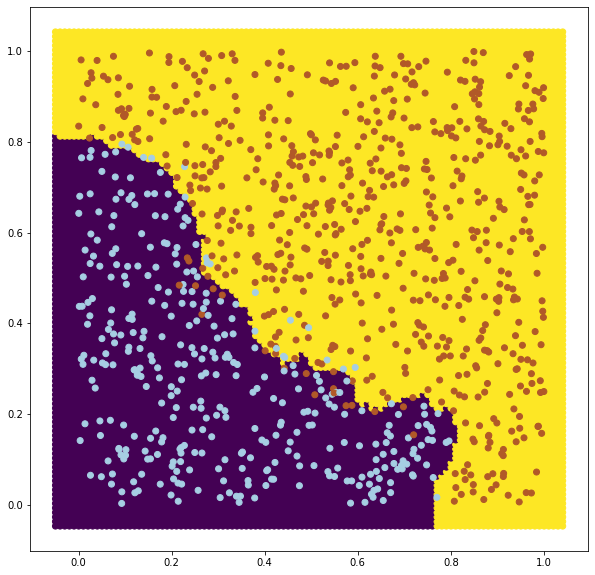

In [17]:
draw(clf_grid,X.values,y.values,0.01)

In [18]:

clf_grid.best_score_

0.9570000000000001

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [21]:
clfk=KNeighborsClassifier(n_neighbors=16)
clfk.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [22]:
confusion_matrix (y_test,clfk.predict(X_test))

array([[109,   7],
       [  8, 206]])

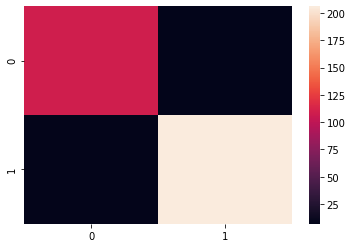

In [23]:
import seaborn as sns
sns.heatmap(confusion_matrix (y_test,clfk.predict(X_test)))

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clfk.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       116
         1.0       0.97      0.96      0.96       214

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



In [25]:
from sklearn.svm import SVC

In [31]:
clfp=GridSearchCV(estimator=SVC(kernel='poly'),param_grid={'degree':np.arange(2,8,2),'C':[.1,10,1000]})

In [32]:
clfp.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10, 1000], 'degree': array([2, 4, 6])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
clfp.best_params_

{'C': 10, 'degree': 6}

In [34]:
clfr=GridSearchCV(estimator=SVC(kernel='rbf'),param_grid={'degree':np.arange(2,8,2),'C':[.1,10,1000]})
clfr.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10, 1000], 'degree': array([2, 4, 6])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
clfr.best_params_

{'C': 1000, 'degree': 2}

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
clfd=DecisionTreeClassifier(max_depth=4,min_samples_leaf=26)
clfd.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=26, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

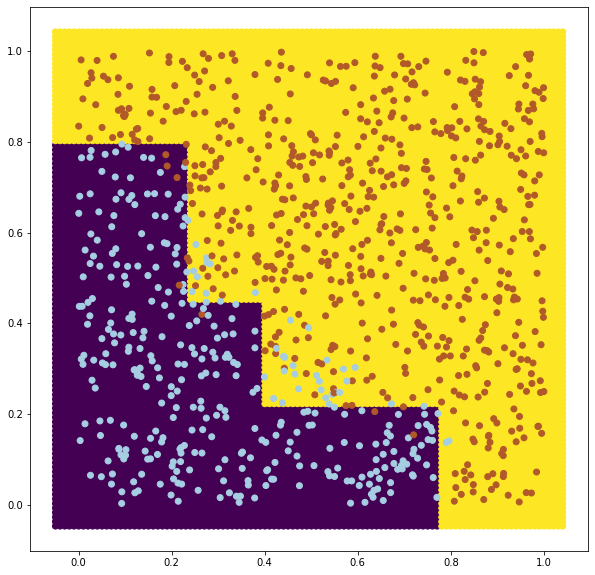

In [56]:
draw(clfd,X.values,y.values,h=0.01)

In [53]:
clfd_grid= GridSearchCV(DecisionTreeClassifier(),param_grid={'min_samples_leaf':np.arange(10,50),'max_depth':np.arange(2,6)})
clfd_grid.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5]),
                

In [54]:
clfd_grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 26}

In [58]:
preds= clfd.predict_proba(X_test)

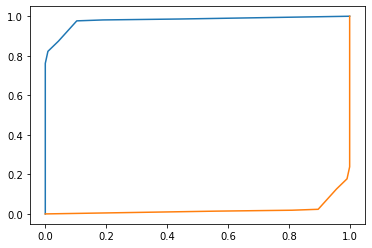

In [63]:
from sklearn.metrics import roc_curve
target_pos=1
fp,tp,_=roc_curve(y_test,clfd.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)
fp,tp,_=roc_curve(y_test,clfd.predict_proba(X_test)[:,0])
plt.plot(fp,tp)

In [60]:
from sklearn.metrics import roc_curve, auc
target_pos=1
fp,tp,_=roc_curve(y_test,clfd.predict_proba(X_test)[:,target_pos])
auc(fp,tp)

0.9786295520464067

In [64]:
import pickle
pickle.dump(clfd,open('modelo.pickle','wb'))

In [ ]:
pickle.load(open('modelo.pickle','rb'))


In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
clfr=RandomForestClassifier (max_depth=4,n_estimators=100)

In [68]:
cross_val_score(clfr,X,y).mean()

0.9490000000000001

In [69]:
clfr_grid=GridSearchCV(RandomForestClassifier(),param_grid={'max_depth':np.arange(2,6),'n_estimators':[10,50,100,200]})
clfr_grid.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [70]:
clfr_grid.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [71]:
clfr=RandomForestClassifier (max_depth=5,n_estimators=50)

In [72]:
cross_val_score(clfr,X,y).mean()

0.952

In [73]:
#Gradient Boosting

#Sklearn
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
clf=GradientBoostingClassifier(max_depth=4,learning_rate=0.1)

In [75]:
cross_val_score(clf,X,y).mean()

0.9469999999999998

In [76]:
#XGBClass
from xgboost import XGBClassifier

In [77]:
clf=XGBClassifier(max_depth=4,learning_rate=0.1)

In [78]:
cross_val_score(clf,X,y)

array([0.93 , 0.96 , 0.965, 0.94 , 0.935])

In [81]:
#LightGBM
import lightgbm as lgb

In [82]:
clf= lgb.LGBMClassifier(max_depth=4,learning_rate=.1)

In [84]:

cross_val_score(clf,X,y).mean()

0.943